In [15]:
import pandas as pd

df = pd.read_csv('water/temp/4.csv')
print(df.columns)
print('min,max,mean,std,skew,kurt')
for col in df.columns[3:12]:
    print(f'{col},{df[col].min():.3f},{df[col].max():.3f},{df[col].mean():.3f}'
          f',{df[col].std():.3f},{df[col].skew():.3f},{df[col].kurt():.3f}')

Index(['index', '监测时间', '站点名称', 'pH值', '总氮', '总磷', '氨氮', '水温', '浑浊度', '溶解氧',
       '电导率', '高锰酸盐指数', 'phFlag', 'TNFlag', 'TPFlag', 'NHFlag', 'temperFlag',
       'turbiFlag', 'doxygenFlag', 'conductFlag', 'permangaFlag'],
      dtype='object')
min,max,mean,std,skew,kurt
pH值,4.111,9.023,6.550,0.957,-0.164,-0.180
总氮,0.540,13.007,6.471,2.361,0.519,-0.144
总磷,0.045,1.172,0.447,0.271,0.815,-0.241
氨氮,0.003,5.963,1.752,1.480,0.949,-0.193
水温,12.042,36.550,26.201,4.808,-0.360,-0.739
浑浊度,0.000,1192.788,20.813,47.653,12.229,222.854
溶解氧,0.005,11.681,4.647,2.437,-0.209,-0.968
电导率,0.000,2639.052,315.000,282.111,2.211,9.733
高锰酸盐指数,0.123,11.167,5.092,2.407,0.863,-0.263


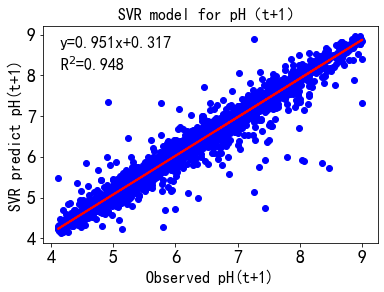

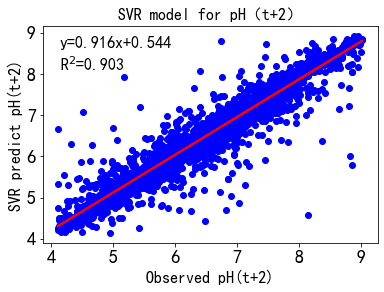

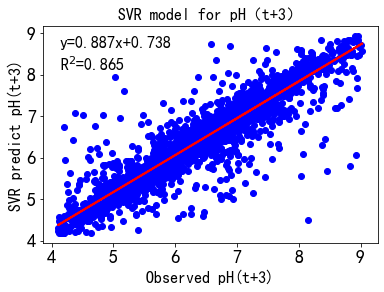

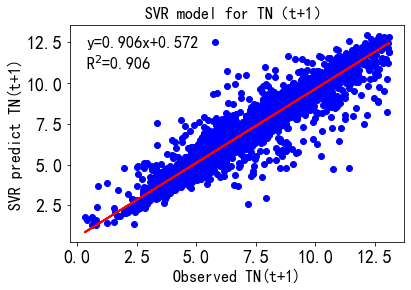

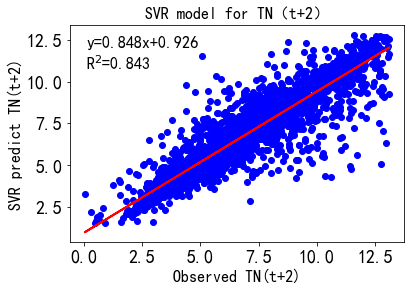

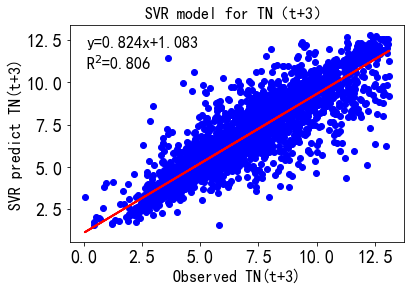

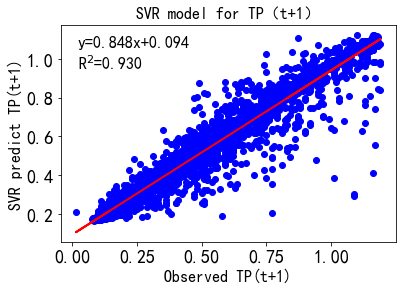

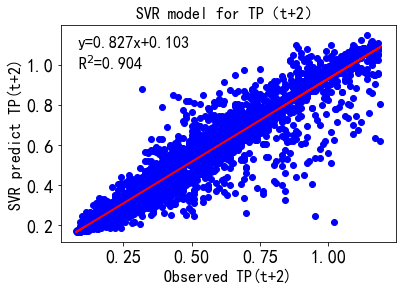

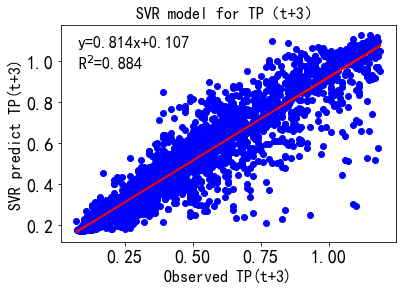

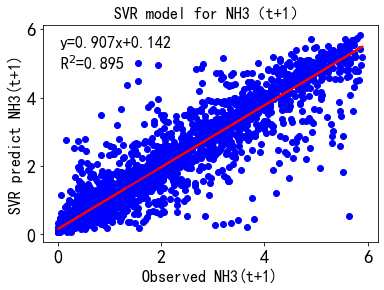

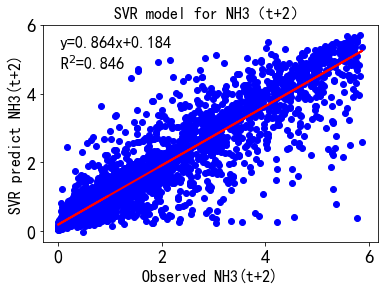

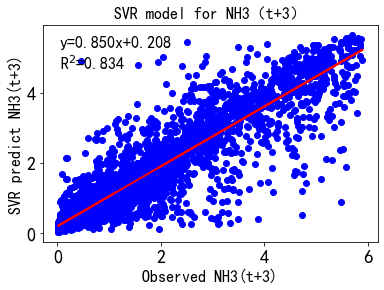

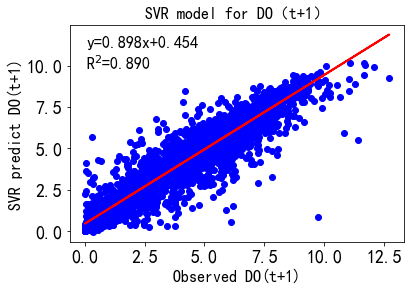

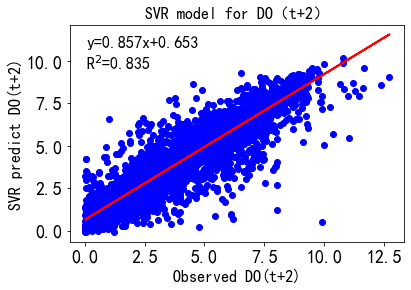

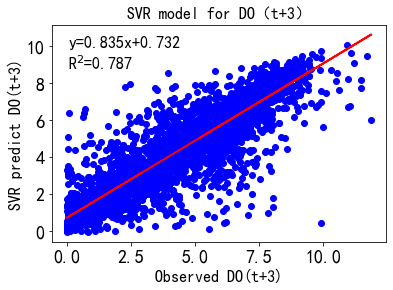

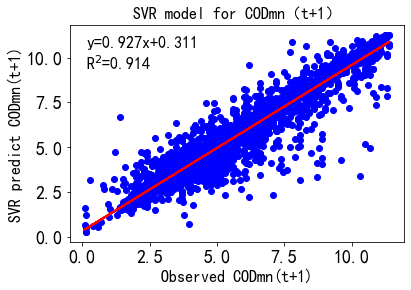

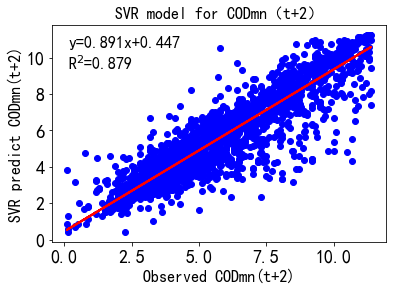

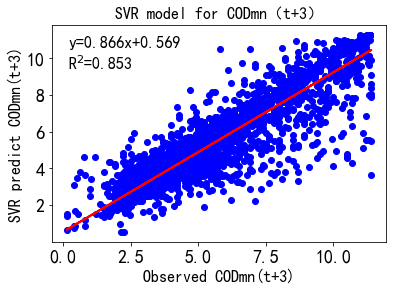

In [3]:
factors = ['pH值', '总氮', '总磷', '氨氮', '水温', '浑浊度', '溶解氧', '电导率', '高锰酸盐指数']
factors_en = ['pH', 'TN', 'TP', 'NH$_3$', '水温', '浑浊度', 'DO', '电导率', 'CODmn']

import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import os

place='shangban'

for fac in [0,1,2,3,6,8]:
    for step in range(3):
        y = np.load(f'data/output/{place}/y/BagSVR/BagSVR_fac{fac}_step{step}.npz')
        # 建立线性回归模型
        regr = linear_model.LinearRegression()
        # 拟合
        y_test = y['y_test'].reshape(-1,1)
        y_pred = y['y_pred'].reshape(-1,1)
        regr.fit(y_test,y_pred) # 注意此处.reshape(-1, 1)，因为X是一维的！

        # 不难得到直线的斜率、截距
        k, b = regr.coef_, regr.intercept_
        r2 = regr.score(y_test,y_pred)

        # 画图
        fig = plt.figure()
        ax = fig.add_subplot()
        # 1.真实的点
        ax.scatter(y_test, y_pred, color='blue')

        # 2.拟合的直线
        ax.plot(y_test, regr.predict(y_test), color='red', linewidth=2)

        plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
        plt.rcParams.update({'font.size':18})
        plt.xlabel(f'Observed {factors_en[fac]}(t+{step+1})',fontsize=16)
        plt.ylabel(f'SVR predict {factors_en[fac]}(t+{step+1})',fontsize=16)
        plt.title(f'SVR model for {factors_en[fac]}（t+{step+1}）',fontsize=16)

        # 写文字
        plt.text(0.05,0.8,f'y={k[0][0]:.3f}x+{b[0]:.3f}\nR$^2$={r2:.3f}',
                 fontsize=16,transform=ax.transAxes)
        save_root = f'data/output/{place}/figure/BagSVR'
        if not os.path.exists(save_root):
            os.makedirs(save_root)
        plt.savefig(f'{save_root}/{factors[fac]}_步长{step+1}_回归.png'
                    ,dpi=960,bbox_inches = 'tight')
        plt.show()
    # break
    

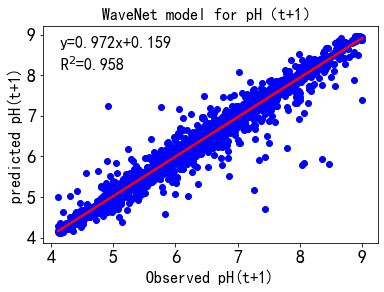

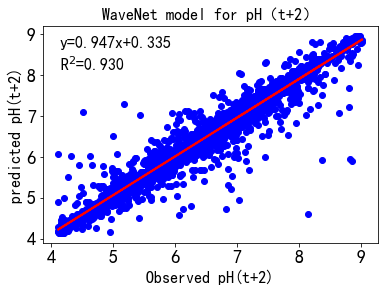

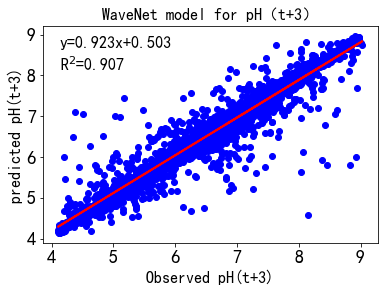

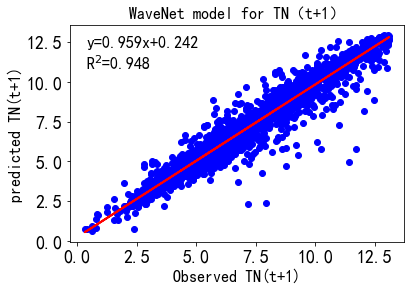

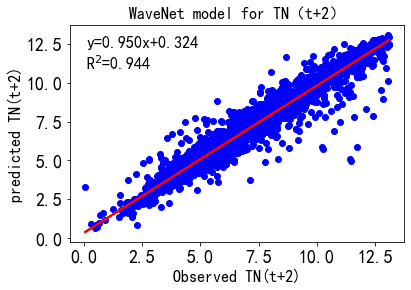

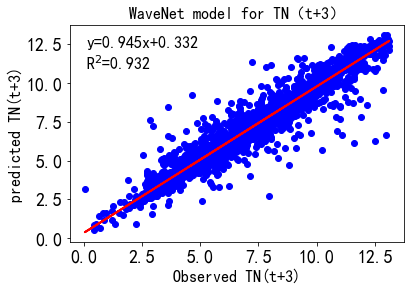

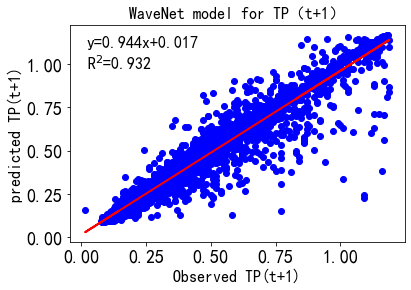

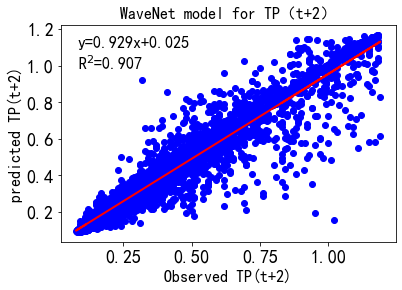

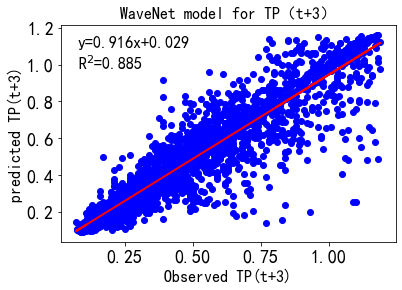

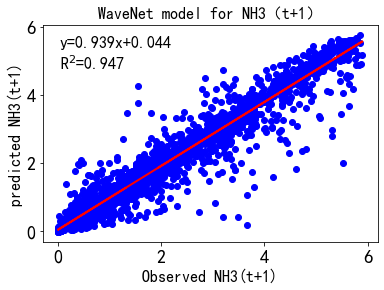

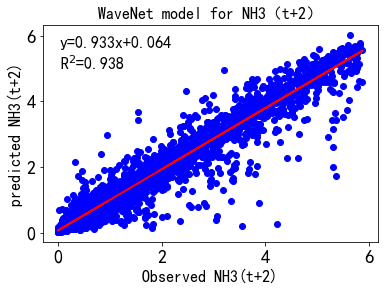

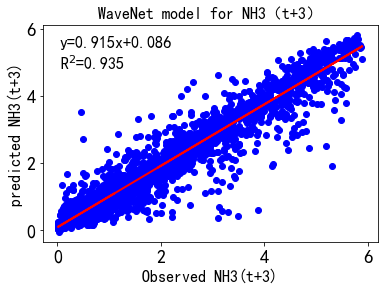

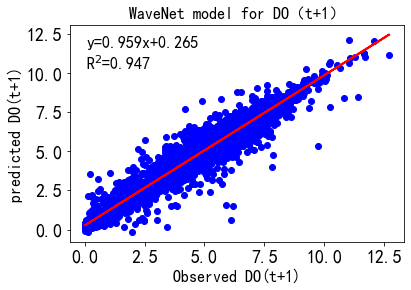

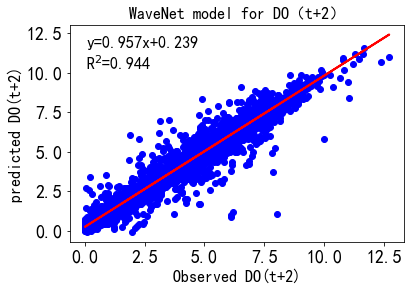

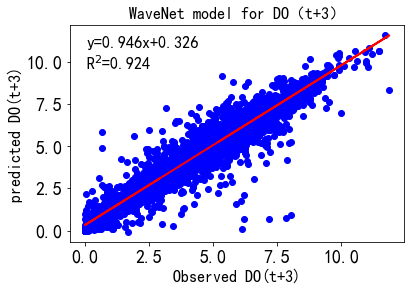

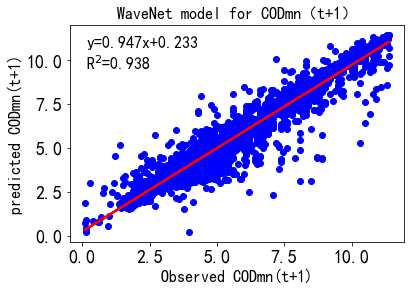

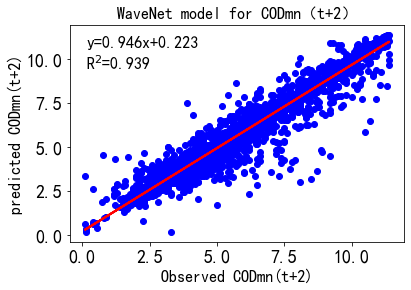

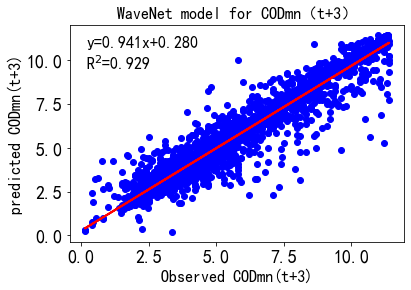

done


In [4]:
###############################################
import numpy as np
from water.SVR.data_generate import merge_site
import matplotlib.pyplot as plt
import os
factors = ['pH值', '总氮', '总磷', '氨氮', '水温', '浑浊度', '溶解氧', '电导率', '高锰酸盐指数']
model_dir = 'GCNLSTM'
# model_dir = 'noGCNLSTM'
# model_dir = 'GCNnoLSTM'
# model_dir = 'noGCNnoLSTM'

for fac in [0, 1, 2, 3, 6, 8]:
    y = np.load(f'data/output/shangban/y/singleWaveNet/{model_dir}/{fac}/out.npz')
    y_test = merge_site(y['y_test'])
    y_pred = merge_site(y['y_pred'])

    # print(f'ytest.shape{y_test.shape}')
    for step in range(3):
        y_test_t = y_test[:,step]
        y_pred_t = y_pred[:,step]
        # 建立线性回归模型
        regr = linear_model.LinearRegression()
        # 拟合
        # y_test = y['y_test'].reshape(-1,1)
        # y_pred = y['y_pred'].reshape(-1,1)
        y_test_t = y_test_t.reshape(-1,1)
        y_pred_t = y_pred_t.reshape(-1,1)
        regr.fit(y_test_t,y_pred_t) # 注意此处.reshape(-1, 1)，因为X是一维的！

        # 不难得到直线的斜率、截距
        k, b = regr.coef_, regr.intercept_
        r2 = regr.score(y_test_t,y_pred_t)

        # 画图
        fig = plt.figure()
        ax = fig.add_subplot()
        # 1.真实的点
        ax.scatter(y_test_t, y_pred_t, color='blue')

        # 2.拟合的直线
        ax.plot(y_test_t, regr.predict(y_test_t), color='red', linewidth=2)

        plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
        plt.rcParams.update({'font.size':18})
        plt.xlabel(f'Observed {factors_en[fac]}(t+{step+1})',fontsize=16)
        plt.ylabel(f'predicted {factors_en[fac]}(t+{step+1})',fontsize=16)
        plt.title(f'WaveNet model for {factors_en[fac]}（t+{step+1}）',fontsize=16)

        # 写文字
        plt.text(0.05,0.8,f'y={k[0][0]:.3f}x+{b[0]:.3f}\nR$^2$={r2:.3f}',
                 fontsize=16,transform=ax.transAxes)
        save_root = f'data/output/{place}/figure/{model_dir}'
        if not os.path.exists(save_root):
            os.makedirs(save_root)
        plt.savefig(f'{save_root}/回归_{factors[fac]}_步长{step+1}.png'
                    ,dpi=960,bbox_inches = 'tight')
        plt.show()
        # break
    # break
print('done')

(100,)


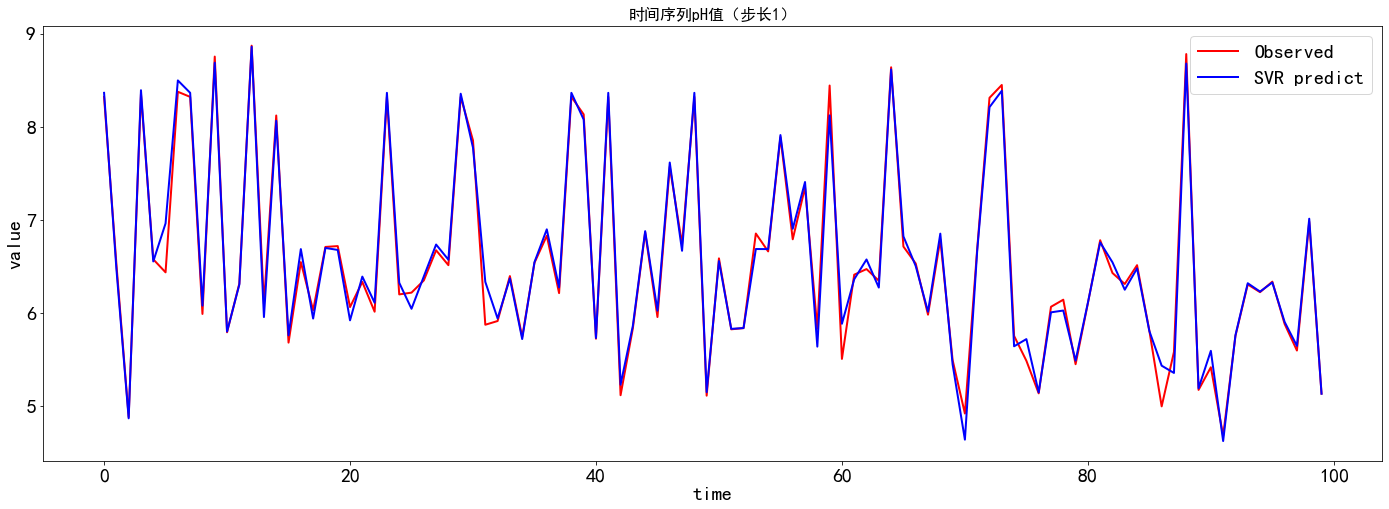

In [9]:
factors = ['pH值', '总氮', '总磷', '氨氮', '水温', '浑浊度', '溶解氧', '电导率', '高锰酸盐指数']
factors_en = ['pH', 'TN', 'TP', 'NH$_3$', '水温', '浑浊度', 'DO', '电导率', 'CODmn']

import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import os

place='shangban'

for fac in [0,1,2,3,6,8]:
    for step in range(3):
        y = np.load(f'data/output/{place}/y/BagSVR/BagSVR_fac{fac}_step{step}.npz')
        # seq_len = int(y['y_test'].size/10)
        seq_len = int(100)
        y_test = y['y_test'][:seq_len]
        y_pred = y['y_pred'][:seq_len]
        fig = plt.figure()
        ax = fig.add_subplot()

        print(y_test.shape)

        xx = np.array(range(y_test.size))

        plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
        plt.rcParams['figure.figsize']=(24,8)
        plt.rcParams.update({'font.size':20})
        plt.xlabel('time',fontsize=20)
        plt.ylabel('value',fontsize=20)


        ax.plot(xx,y_test, color='red', linewidth=2,label='Observed')
        ax.plot(xx,y_pred, color='blue', linewidth=2,label='SVR predict')
        plt.legend()

        # 保存
        save_root = f'data/output/shangban/figure/merge'
        if not os.path.exists(save_root):
            os.makedirs(save_root)
        plt.title(f'时间序列{factors[fac]}（步长{step+1}）',fontsize=16)
        # plt.text(0.05,0.8,f'y={k[0][0]:.3f}x+{b[0]:.3f}\nR2={r2:.3f}',
        #          fontsize=16,transform=ax.transAxes)
        plt.savefig(f'{save_root}/时间序列_{factors[fac]}.png'
                    ,dpi=960,bbox_inches = 'tight')
        plt.show()
        break
    break
        


In [23]:

def np_rmspe(y_true, y_pred):
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))
    return loss


from sklearn import metrics
from scipy.stats import pearsonr
factors = ['pH值', '总氮', '总磷', '氨氮', '水温', '浑浊度', '溶解氧', '电导率', '高锰酸盐指数']

import numpy as np

mae_list = []
mape_list = []
rmse_list = []
rmspe_list = []
r2_list = []
r_list = []

print(',MAE,MAPE,RMSE,RMSPE,r2,r')
for fac in [0,1,2,3,6,8]:
    for step in range(3):
        y = np.load(f'data/output/shangban/y/BagSVR/BagSVR_fac{fac}_step{step}.npz')
        
        y_test_t = y['y_test']
        y_pred = y['y_pred']
        
        mae = metrics.mean_absolute_error(y_test_t, y_pred)
        rmse = metrics.mean_squared_error(y_test_t, y_pred) ** 0.5
        r2 = metrics.r2_score(y_test_t, y_pred)
        mape = metrics.mean_absolute_percentage_error(y_test_t, y_pred)
        r = pearsonr(y_test_t, y_pred)[0]
        rmspe = np_rmspe(y_test_t, y_pred)

        print(f'{factors[fac]}{step}th,{mae:.4f},{mape:.4f},'
              f'{rmse:.4f},{rmspe:.4f},{r2:.4f},{r:.4f}')

        mae_list.append(mae)
        mape_list.append(mape)
        rmse_list.append(rmse)
        rmspe_list.append(rmspe)
        r_list.append(r)
        r2_list.append(r2)
    # break

# 计算平均值
print(f'平均,{np.mean(mae_list):.4f},{np.mean(mape_list):.4f},'
      f'{np.mean(rmse_list):.4f},{np.mean(rmspe_list):.4f},'
      f'{np.mean(r2_list):.4f},{np.mean(r_list):.4f}')


,MAE,MAPE,RMSE,RMSPE,r2,r
pH值0th,0.1179,0.0185,0.2245,0.0350,0.9476,0.9734
pH值1th,0.1696,0.0269,0.3054,0.0498,0.9026,0.9501
pH值2th,0.2007,0.0319,0.3612,0.0593,0.8640,0.9299
总氮0th,0.4155,0.0703,0.7497,0.1707,0.9057,0.9519
总氮1th,0.5695,0.1096,0.9762,0.9655,0.8418,0.9179
总氮2th,0.6481,0.1220,1.0758,0.9617,0.8052,0.8980
总磷0th,0.0612,0.2149,0.0829,0.3771,0.9147,0.9645
总磷1th,0.0698,0.2307,0.0943,0.3180,0.8894,0.9508
总磷2th,0.0752,0.2418,0.1017,0.3314,0.8707,0.9400
氨氮0th,0.2653,0.3560,0.4964,1.3767,0.8942,0.9458
氨氮1th,0.3416,0.4164,0.6031,1.3687,0.8442,0.9197
氨氮2th,0.3663,0.4862,0.6242,1.5685,0.8321,0.9130
溶解氧0th,0.5381,0.7158,0.8482,6.7007,0.8902,0.9436
溶解氧1th,0.6771,1.4317,1.0412,29.5237,0.8339,0.9135
溶解氧2th,0.7624,1.5979,1.1789,20.6617,0.7843,0.8874
高锰酸盐指数0th,0.4089,0.1015,0.7295,0.3645,0.9132,0.9560
高锰酸盐指数1th,0.4997,0.1238,0.8740,0.6987,0.8762,0.9373
高锰酸盐指数2th,0.5557,0.1299,0.9665,0.3852,0.8504,0.9235
平均,0.3746,0.3570,0.6297,3.6620,0.8700,0.9342


In [19]:
import numpy as np
from sklearn import metrics
from water.SVR.data_generate import merge_site

model_dir = 'GCNLSTM'
# model_dir = 'noGCNLSTM'
# model_dir = 'GCNnoLSTM'
# model_dir = 'noGCNnoLSTM'

mae_list = []
mape_list = []
rmse_list = []
rmspe_list = []
r2_list = []
r_list = []

print(',MAE,MAPE,RMSE,RMSPE,r2,r')
for fac in [0, 1, 2, 3, 6, 8]:
    y = np.load(f'data/output/shangban/y/singleWaveNet/{model_dir}/{fac}/out.npz')
    y_test = merge_site(y['y_test'])
    y_pred = merge_site(y['y_pred'])

    # print(f'scoring fac {fac}')
    for step in range(3):
        y_test_t = y_test[:,step]
        y_pred_t = y_pred[:,step]

        mae = metrics.mean_absolute_error(y_test_t, y_pred_t)
        mape = metrics.mean_absolute_percentage_error(y_test_t, y_pred_t)
        rmse = metrics.mean_squared_error(y_test_t, y_pred_t) ** 0.5
        rmspe = np_rmspe(y_test_t, y_pred_t)
        r2 = metrics.r2_score(y_test_t, y_pred_t)
        r = pearsonr(y_test_t, y_pred_t)[0]

        print(f'{factors[fac]}{step}th,{mae:.4f},{mape:.4f},'
              f'{rmse:.4f},{rmspe:.4f},{r2:.4f},{r:.4f}')

        mae_list.append(mae)
        mape_list.append(mape)
        rmse_list.append(rmse)
        rmspe_list.append(rmspe)
        r_list.append(r)
        r2_list.append(r2)

# 计算平均值
print(f'平均,{np.mean(mae_list):.4f},{np.mean(mape_list):.4f},'
      f'{np.mean(rmse_list):.4f},{np.mean(rmspe_list):.4f},'
      f'{np.mean(r2_list):.4f},{np.mean(r_list):.4f}')

,MAE,MAPE,RMSE,RMSPE,r2,r
pH值0th,0.1016,0.0158,0.2032,0.0310,0.9570,0.9786
pH值1th,0.1343,0.0211,0.2591,0.0413,0.9299,0.9645
pH值2th,0.1544,0.0245,0.2986,0.0482,0.9071,0.9526
总氮0th,0.3107,0.0504,0.5578,0.0943,0.9478,0.9737
总氮1th,0.3239,0.0696,0.5787,0.9655,0.9444,0.9718
总氮2th,0.3575,0.0749,0.6373,0.9370,0.9316,0.9654
总磷0th,0.0367,0.0890,0.0746,0.2226,0.9309,0.9653
总磷1th,0.0464,0.1073,0.0870,0.1695,0.9059,0.9523
总磷2th,0.0536,0.1221,0.0969,0.1879,0.8826,0.9406
氨氮0th,0.1898,0.2078,0.3577,0.6330,0.9451,0.9730
氨氮1th,0.2096,0.2545,0.3829,0.8943,0.9372,0.9687
氨氮2th,0.2248,0.3074,0.3933,1.0505,0.9334,0.9672
溶解氧0th,0.3789,0.3823,0.5952,2.2055,0.9459,0.9731
溶解氧1th,0.3668,0.5584,0.6078,8.1262,0.9434,0.9715
溶解氧2th,0.4300,0.4739,0.7074,4.5703,0.9223,0.9611
高锰酸盐指数0th,0.3340,0.0861,0.6156,0.3568,0.9382,0.9687
高锰酸盐指数1th,0.3386,0.0888,0.6149,0.5828,0.9387,0.9691
高锰酸盐指数2th,0.3722,0.0910,0.6673,0.2444,0.9287,0.9638
平均,0.2424,0.1680,0.4297,1.1867,0.9317,0.9656


In [6]:
import numpy as np
from sklearn import metrics
from water.SVR.data_generate import merge_site

for fac in [0, 1, 2, 3, 6, 8]:
    y = np.load(f'data/output/shangban/y/LSTM/{fac}/out.npz')
    y_test = merge_site(y['y_test'])
    y_pred = merge_site(y['y_pred'])

    print(f'scoring fac {fac}')
    for step in range(3):
        y_test_t = y_test[:,step]
        y_pred_t = y_pred[:,step]

        mae = metrics.mean_absolute_error(y_test_t, y_pred_t)
        mape = metrics.mean_absolute_percentage_error(y_test_t, y_pred_t)
        rmse = metrics.mean_squared_error(y_test_t, y_pred_t) ** 0.5
        rmspe = np_rmspe(y_test_t, y_pred_t)
        r2 = metrics.r2_score(y_test_t, y_pred_t)
        r = pearsonr(y_test_t, y_pred_t)[0]

        print(f'MAE:{mae:.3f},RMSE:{rmse:.3f},MAPE:{mape:.3f},R2:{r2:.3f}')
    break

scoring fac 0
MAE:0.141,RMSE:0.248,MAPE:0.022,R2:0.936
MAE:0.187,RMSE:0.321,MAPE:0.030,R2:0.892
MAE:0.225,RMSE:0.379,MAPE:0.036,R2:0.850


In [14]:
import water.SVR.data_generate as data_generate
import numpy as np
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.stats import pearsonr
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import os
from sklearn.tree import DecisionTreeRegressor

factors = ['pH值', '总氮', '总磷', '氨氮', '水温', '浑浊度', '溶解氧', '电导率', '高锰酸盐指数']
fac_index = 0

x_train, y_train, x_val, y_val, x_test, y_test = \
    data_generate.load_single_data(fac_index=fac_index, y_bool=False, y_length=3)

# maes=[]
# 每个步长分别预测

for step in range(3):
    # print(f'running {factors[fac_index]} for {step}th step')
    y_train_t = y_train[:,step]
    y_test_t = y_test[:,step]

    bag_svr = BaggingRegressor(base_estimator=SVR(), n_estimators=32, random_state=0)
    regr = make_pipeline(StandardScaler(),bag_svr)
    # regressor = DecisionTreeRegressor(random_state=0)
    # regr = RandomForestRegressor(max_depth=2, random_state=0)
    # regr = AdaBoostRegressor(random_state=0, n_estimators=100)
    # BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0)
    regr.fit(x_train, y_train_t)
    y_pred = regr.predict(x_test)

    # # 保存预测值
    # np.savez_compressed(
    #     os.path.join('data/output/shangban/y/SVR', f"SVR_fac{fac_index}_step{step}.npz"),
    #     y_pred=y_pred,
    #     y_test=y_test_t
    # )

    mae = metrics.mean_absolute_error(y_test_t, y_pred)
    rmse = metrics.mean_squared_error(y_test_t, y_pred) ** 0.5
    r2 = metrics.r2_score(y_test_t, y_pred)
    mape = metrics.mean_absolute_percentage_error(y_test_t, y_pred)
    r = pearsonr(y_test_t, y_pred)[0]
    print(f'{factors[fac_index]}{step}th,{mae:.4f},{rmse:.4f},{r2:.4f},{mape:.4f},{r:.4f}')


    break

pH值0th,0.1179,0.2245,0.9476,0.0185,0.9734


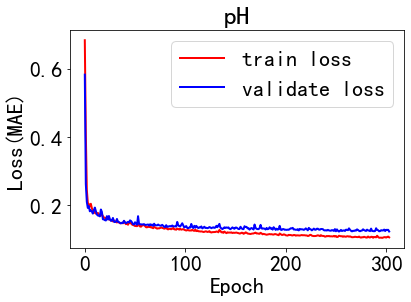

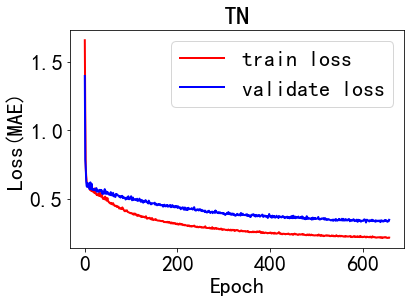

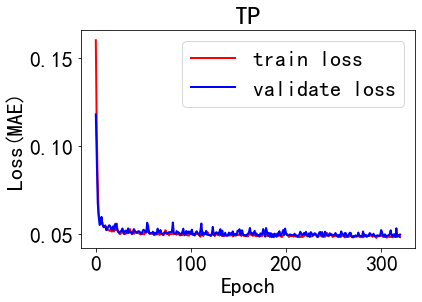

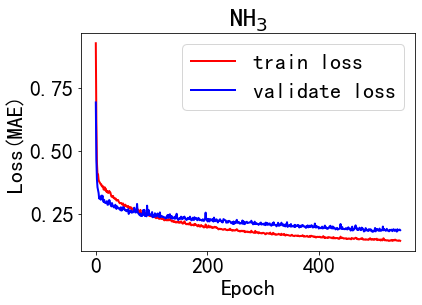

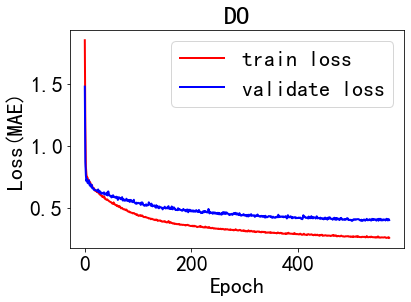

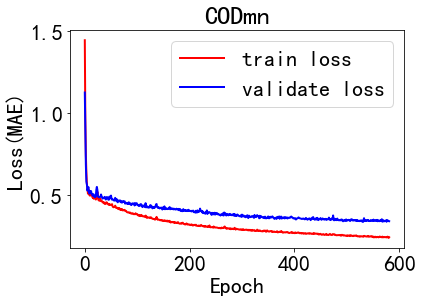

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
factors = ['pH值', '总氮', '总磷', '氨氮', '水温', '浑浊度', '溶解氧', '电导率', '高锰酸盐指数']
factors_en = ['pH', 'TN', 'TP', 'NH$_3$', '水温', '浑浊度', 'DO', '电导率', 'CODmn']
model_dir = 'GCNLSTM'
# model_dir = 'noGCNLSTM'
# model_dir = 'GCNnoLSTM'
# model_dir = 'noGCNnoLSTM'
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
plt.rcParams.update({'font.size':22})

for fac in [0, 1, 2, 3, 6, 8]:
    loss = np.load(f'data/output/shangban/loss/singleWaveNet/{model_dir}/{fac}/loss.npz')
    train_loss = loss['train_loss']
    val_loss = loss['val_loss']
    xx = np.array(range(train_loss.size))
    # 画图
    fig = plt.figure()
    ax = fig.add_subplot()
    # ax.set_aspect(1000)


    plt.xlabel('Epoch')
    plt.ylabel('Loss(MAE)')
    # plt.rcParams['figure.figsize']=(5,5)

    ax.plot(xx,train_loss, color='red', linewidth=2,label='train')
    ax.plot(xx,val_loss, color='blue', linewidth=2,label='validate')


    plt.legend()

    # 保存
    save_root = f'data/output/shangban/figure/{model_dir}'
    if not os.path.exists(save_root):
        os.makedirs(save_root)
    plt.title(f'{factors_en[fac]}')

    plt.savefig(f'{save_root}/loss_{factors[fac]}.png'
                ,dpi=960,bbox_inches = 'tight')
    plt.show()
    # break




In [1]:
import water.common as water_common
all_test,all_pred = water_common.load_all_y()
print(all_test.shape)


(5, 6, 3, 3610)
